# Introduction to Tensors and Torch

**"In mathematics, a tensor is an arbitrarily complex geometric object that maps in a multi-linear manner geometric vectors, scalars, and other tensors to a resulting tensor."** -- Wikipedia



Here's another excerpt from the Wikipedia article on tensors:

> *Although seemingly different, the various approaches to defining tensors describe the same geometric concept using different language and at different levels of abstraction.*
> ### *As multidimensional arrays*
> *A tensor may be represented as a (potentially multidimensional) array (although a multidimensional array is not necessarily a representation of a tensor, as discussed below with regard to holors).*

In this class, when we say **tensor**, we will just mean **a multidimensional array**. But the term **dimension** can get confusingly overloaded here. Let's see why.

A 1-dimensional tensor is just a vector. In this class, we'll predominantly be using the ```torch``` package for manipulating tensors. In ```torch```, we create a vector as follows:

In [2]:
from torch import tensor
v = tensor([4, 5, 6, 7, 8])
v

tensor([4, 5, 6, 7, 8])

Ok, but then this ends up being described as a vector of dimension 5, or **a 1-dimensional tensor of dimension 5**. Which is super confusing. So typically, when refer to these separate concepts as the **order** and the **shape**. So this is an **order-1 tensor of shape (5)**. We can get these numbers from the tensor.

In [3]:
print('The order of the tensor is {}.'.format(v.dim()))
print('The shape of the tensor is {}.'.format(v.shape))

The order of the tensor is 1.
The shape of the tensor is torch.Size([5]).


Note that ```.shape``` is an attribute of the tensor, not a method call. You can get parts of vectors in a similar way you would for Python lists.

In [4]:
print(v[:3]) # Should print tensor([4, 5, 6])
print(v[2:]) # Should print tensor([6, 7, 8])
print(v[2:4]) # Should print tensor([6, 7])

tensor([4, 5, 6])
tensor([6, 7, 8])
tensor([6, 7])


**Exercise:** what's a simple way to extract the vector ```[4, 6, 8]```?

In [5]:
print(v[::2]) # returns tensor([4, 6, 8])

tensor([4, 6, 8])


An important special case is converting an order-1 tensor into a scalar. In ```torch```, they recommend doing this using ```.item()```.

In [6]:
w = tensor([12]) # An order-1 tensor of shape 1; a tensor with one element
w.item()

12

Note that ```.item()``` will throw an exception if you apply it to a non-singleton.

In [ ]:
v.item()

An order-2 tensor is a **matrix**. Here's how we would create a matrix with 4 rows and 3 columns using ```torch```.

In [7]:
import torch
M = tensor([[4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]])
print(M)
print('The order of M is {}.'.format(M.dim()))
print('The shape of M is {}.'.format(M.shape))

tensor([[ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])
The order of M is 2.
The shape of M is torch.Size([4, 3]).


How do we get submatrices? It's sort of like the syntax for getting parts of Python lists, though a bit weird to get used to.

In [8]:
print(M) 
print(M[:2]) # first two rows

tensor([[ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])
tensor([[4, 5, 6],
        [7, 8, 9]])


In [9]:
print(M) 
print(M[2:4]) # last two rows

tensor([[ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])
tensor([[10, 11, 12],
        [13, 14, 15]])


In [10]:
print(M) 
print(M[0::2]) # every second row

tensor([[ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])
tensor([[ 4,  5,  6],
        [10, 11, 12]])


In [13]:
print(M) 
print(M[ : , :2]) # first two columns
    # M[ selection for rows, selection for columns]

tensor([[ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])
tensor([[ 4,  5],
        [ 7,  8],
        [10, 11],
        [13, 14]])


In [14]:
print(M) 
print(M[:,2:3]) # last column

tensor([[ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])
tensor([[ 6],
        [ 9],
        [12],
        [15]])


In [15]:
print(M) 
print(M[:,0::2]) # every second column

tensor([[ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])
tensor([[ 4,  6],
        [ 7,  9],
        [10, 12],
        [13, 15]])


**Exercise:** How do you extract ```tensor([[7, 9], [10, 12]])```?

In [16]:
print(M[1:3,::2])

tensor([[ 7,  9],
        [10, 12]])


You can do the usual elementwise operations on matrices, and transpose them.

In [19]:
print(M)
print()
print(M+M)
print(3*M)
print(M*M) # note: this is elementwise multiplication (sometimes called Hadamard product), not matrix multiplication!
print(M.t())

tensor([[ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])

tensor([[ 8, 10, 12],
        [14, 16, 18],
        [20, 22, 24],
        [26, 28, 30]])
tensor([[12, 15, 18],
        [21, 24, 27],
        [30, 33, 36],
        [39, 42, 45]])
tensor([[ 16,  25,  36],
        [ 49,  64,  81],
        [100, 121, 144],
        [169, 196, 225]])
tensor([[ 4,  7, 10, 13],
        [ 5,  8, 11, 14],
        [ 6,  9, 12, 15]])


You can do standard matrix multiplication with the ```.mm()``` method.

In [22]:
print(M)
print(M.t())
print()
print(M.mm(M.t()))

tensor([[ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])
tensor([[ 4,  7, 10, 13],
        [ 5,  8, 11, 14],
        [ 6,  9, 12, 15]])

tensor([[ 77, 122, 167, 212],
        [122, 194, 266, 338],
        [167, 266, 365, 464],
        [212, 338, 464, 590]])


One issue that is likely going to bite you again and again is the datatype of matrices, which tells you what the entries of the matrices are: usually either floating point (of some kind) or integer (of some kind). ```torch``` does its best to guess what you want, but it's not psychic. For the matrix ```M2```, it assumes that because all the initialized entries are integers, then we want a matrix with an integer datatype.

In [23]:
M2 = tensor([[4,5,6],[2,8,9],[1,7,3]])
print(M2.dtype)

torch.int64


But maybe we wanted these to be floating point, and unsuspectingly try to take the matrix inverse.

In [24]:
torch.inverse(M2)

RuntimeError: "inverse_cpu" not implemented for 'Long'

Essentially it's complaining that a matrix of datatype ```torch.int64``` (a so-called ```LongTensor```) can't be inverted, because there's no integer matrix ```M^-1``` by which we can multiply it such that ```M * M^-1 = I```. So we need to tell it explicitly that we want to treat matrix ```M``` as a floating-point matrix.

In [33]:
M2 = M2.float()
M2inv = torch.inverse(M2)
print(M2inv)
I = M2.mm(M2inv)
print(I)

tensor([[ 0.3714, -0.2571,  0.0286],
        [-0.0286, -0.0571,  0.2286],
        [-0.0571,  0.2190, -0.2095]])
tensor([[ 1.0000e+00,  8.9407e-08, -8.9407e-08],
        [-3.3528e-08,  1.0000e+00, -1.4901e-08],
        [-2.6077e-08, -1.4901e-08,  1.0000e+00]])


**Exercise:** How do we convert this back to a LongTensor?

In [35]:
Iint = I.round().long()
print(Iint)
print(Iint.dtype)

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])
torch.int64


```reshape``` is a kind of magical operation that repacks the elements of a matrix into a different shape by copying the elements row by row.

In [36]:
print(M)
print(M.reshape((2, 6)))
print(M.reshape(12))

tensor([[ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])
tensor([[ 4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15]])
tensor([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])


```torch``` supports the notion of **broadcasting**, which allows us to conveniently use elementwise operators over tensors of different orders. For instance, if we add a vector ```v``` of shape (3) to a matrix ```M``` of shape (4,3), then ```torch``` assumes that we want to add two (4,3) matrices. One is just ```M```. The other is 4 copies of vector ```v``` piled on top of each other to make another (4,3) matrix. Surprisingly this turns out to be useful. In general, you can use broadcasting to apply elementwise operations if one tensor has shape (a, b, ... n, n + 1, ... m) and the other has shape (n, n + 1, ... m). 

In [40]:
v = tensor([1, 2, 3])
v_order2 = tensor([[1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]])
M = tensor([[4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]])
print('M and v:', v)
print(M+v)
print('M and v_order2:', v_order2)
print(M+v_order2)

M and v: tensor([1, 2, 3])
tensor([[ 5,  7,  9],
        [ 8, 10, 12],
        [11, 13, 15],
        [14, 16, 18]])
M and v_order2: tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])
tensor([[ 5,  7,  9],
        [ 8, 10, 12],
        [11, 13, 15],
        [14, 16, 18]])


Can you think of an example of an order-3 tensor, famous in pop culture? Hint, its shape is (3, 3, 3).

![order-three tensor](img/mystery.jpg "Order 3 tensor")


Another useful order-3 tensor is an image file. Consider this image of the Swiss flag:

![swiss flag](img/swiss.gif "Swiss flag")

We can view the pixels as a 5x5 matrix. If this were a black-and-white image, it would look like:

In [41]:
SWISS_FLAG_BW = tensor([[0,0,0,0,0],[0,0,1,0,0],[0,1,1,1,0],[0,0,1,0,0],[0,0,0,0,0]])
print(SWISS_FLAG_BW)

tensor([[0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0]])


But it isn't a black-and-white image, it's a color image, which means that for each pixel, there's a red value (from 0-255), a green value (from 0-255), and a blue value (from 0-255).

**Exercise:** Represent the Swiss flag as an order-three tensor.

In [44]:
SWISS_FLAG = tensor( [ [ [255,255,255,255,255],
                         [255,255,255,255,255],
                         [255,255,255,255,255],
                         [255,255,255,255,255],
                         [255,255,255,255,255]],
                       [[0,0,0,0,0],
                        [0,0,255,0,0],
                        [0,255,255,255,0],
                        [0,0,255,0,0],
                        [0,0,0,0,0],],
                      [[0,0,0,0,0],
                        [0,0,255,0,0],
                        [0,255,255,255,0],
                        [0,0,255,0,0],
                        [0,0,0,0,0],]
                     ]) # TODO: complete this line
print(SWISS_FLAG)
print('The Swiss flag has shape: {}.'.format(SWISS_FLAG.shape))

tensor([[[255, 255, 255, 255, 255],
         [255, 255, 255, 255, 255],
         [255, 255, 255, 255, 255],
         [255, 255, 255, 255, 255],
         [255, 255, 255, 255, 255]],

        [[  0,   0,   0,   0,   0],
         [  0,   0, 255,   0,   0],
         [  0, 255, 255, 255,   0],
         [  0,   0, 255,   0,   0],
         [  0,   0,   0,   0,   0]],

        [[  0,   0,   0,   0,   0],
         [  0,   0, 255,   0,   0],
         [  0, 255, 255, 255,   0],
         [  0,   0, 255,   0,   0],
         [  0,   0,   0,   0,   0]]])
The Swiss flag has shape: torch.Size([3, 5, 5]).


Sometimes it can be easier to use torch's tensor concatenation operations to construct these.

In [45]:
SWISS_FLAG_RED = tensor( [ [255,255,255,255,255],
                           [255,255,255,255,255],
                           [255,255,255,255,255],
                           [255,255,255,255,255],
                           [255,255,255,255,255]])

SWISS_FLAG_GREEN = tensor([[0,0,0,0,0],
                           [0,0,255,0,0],
                           [0,255,255,255,0],
                           [0,0,255,0,0],
                           [0,0,0,0,0]])

SWISS_FLAG_BLUE  = tensor([[0,0,0,0,0],
                           [0,0,255,0,0],
                           [0,255,255,255,0],
                           [0,0,255,0,0],
                           [0,0,0,0,0]])

SWISS_FLAG = torch.stack([SWISS_FLAG_RED, SWISS_FLAG_GREEN, SWISS_FLAG_BLUE])
print(SWISS_FLAG)
print('The Swiss flag has shape: {}.'.format(SWISS_FLAG.shape))

tensor([[[255, 255, 255, 255, 255],
         [255, 255, 255, 255, 255],
         [255, 255, 255, 255, 255],
         [255, 255, 255, 255, 255],
         [255, 255, 255, 255, 255]],

        [[  0,   0,   0,   0,   0],
         [  0,   0, 255,   0,   0],
         [  0, 255, 255, 255,   0],
         [  0,   0, 255,   0,   0],
         [  0,   0,   0,   0,   0]],

        [[  0,   0,   0,   0,   0],
         [  0,   0, 255,   0,   0],
         [  0, 255, 255, 255,   0],
         [  0,   0, 255,   0,   0],
         [  0,   0,   0,   0,   0]]])
The Swiss flag has shape: torch.Size([3, 5, 5]).


We can actually display this image in this notebook using a plotting library called ```matplotlib``` (which, if you don't have, make sure you ```pip install matplotlib```). The problem is, it expects the image tensor to have shape ```(5,5,3)```, rather than ```(3,5,5)```. In other words, rather than ```(color,x,y)``` coordinates, it expects ```(x,y,color)``` coordinates. Luckily, higher-order tensors have generalized transpose operations that swap arbitrary axes.

In [46]:
T = tensor([[[1,2], [3,4]], [[5,6], [7,8]]])
print(T.shape)
print(T)
print(T.transpose(0,1))

torch.Size([2, 2, 2])
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
tensor([[[1, 2],
         [5, 6]],

        [[3, 4],
         [7, 8]]])


In [47]:
print(T)
print(T.transpose(0,2))

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
tensor([[[1, 5],
         [3, 7]],

        [[2, 6],
         [4, 8]]])


In [48]:
print(T)
print(T.transpose(1,2))

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
tensor([[[1, 3],
         [2, 4]],

        [[5, 7],
         [6, 8]]])


**Exercise:** Convert the Swiss flag into an image tensor.

The original flag shape: torch.Size([3, 5, 5]).
The modified flag shape: torch.Size([5, 5, 3]).


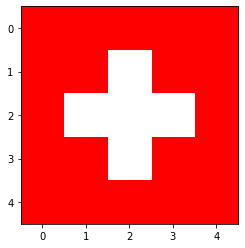

In [53]:
from matplotlib.pyplot import imshow
%matplotlib inline
new_flag = SWISS_FLAG.transpose(0,2) # TODO: complete this line!
new_flag = new_flag.transpose(0,1)
print('The original flag shape: {}.'.format(SWISS_FLAG.shape))
print('The modified flag shape: {}.'.format(new_flag.shape))
imshow(new_flag)


**This tutorial is now complete. Please proceed to do the exercise "Rubik" from the Github Classroom:**

https://classroom.github.com/classrooms/46545598-csci-378-spring-2019